In [1]:
setwd("C:/Users/Zoe/Desktop/Disertatie/Coduri")

In [3]:
library(readxl)
library(MASS)
library(base)
library(vars)
library(car)
library(forecast)
library(tseries)

In [4]:
Disertatie <- read_excel("Disertatie.xlsx")

In [5]:
train_data <- Disertatie[1:(nrow(Disertatie)-7), ]
test_data <- Disertatie[(nrow(Disertatie)-6):(nrow(Disertatie)-1), ]

In [6]:
model1 <- lm(RI ~ ., data = train_data[-1])
model1


Call:
lm(formula = RI ~ ., data = train_data[-1])

Coefficients:
(Intercept)          RPM       R_CRED        R_DEP          EUR           SN  
  -8.924641     0.894233     0.446207    -0.279837    -0.982760     0.004656  
RSBIM_15_74  
   0.134469  


In [7]:
summary(model1)


Call:
lm(formula = RI ~ ., data = train_data[-1])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4638 -1.2836 -0.5536  1.3371  5.7758 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.9246412  3.3588910  -2.657  0.00850 ** 
RPM          0.8942327  0.3198569   2.796  0.00567 ** 
R_CRED       0.4462073  0.1861492   2.397  0.01743 *  
R_DEP       -0.2798373  0.1935730  -1.446  0.14980    
EUR         -0.9827601  1.0267328  -0.957  0.33961    
SN           0.0046557  0.0005682   8.194  2.7e-14 ***
RSBIM_15_74  0.1344690  0.1834761   0.733  0.46446    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.02 on 205 degrees of freedom
Multiple R-squared:  0.6787,	Adjusted R-squared:  0.6693 
F-statistic: 72.16 on 6 and 205 DF,  p-value: < 2.2e-16


In [10]:
model_summary <- summary(model1)
coefficients <- model_summary$coefficients
coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-8.924641176,3.3588909614,-2.6570202,8.504391e-03
RPM,0.894232681,0.3198569241,2.7957271,5.670497e-03
R_CRED,0.446207304,0.1861491996,2.3970412,1.742569e-02
R_DEP,-0.279837336,0.1935729880,-1.4456425,1.498045e-01
EUR,-0.982760052,1.0267328346,-0.9571721,3.396078e-01
SN,0.004655651,0.0005681932,8.1937820,2.704734e-14
RSBIM_15_74,0.134468974,0.1834761497,0.7328962,4.644589e-01


In [12]:
library(stargazer)

model <- lm(formula = RI ~ ., data = train_data[-1])

# Afisarea rezumatului modelului cu stargazer
stargazer(model, title = "Summary of Linear Regression Model",
          align = TRUE, 
          digits = 4,
          star.cutoffs = c(0.05, 0.01, 0.001),
          header = FALSE)



\begin{table}[!htbp] \centering 
  \caption{Summary of Linear Regression Model} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-4} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & \multicolumn{1}{c}{RI} \\ 
\hline \\[-1.8ex] 
 RPM & 0.8942^{**} \\ 
  & (0.3199) \\ 
  & \\ 
 R\_CRED & 0.4462^{*} \\ 
  & (0.1861) \\ 
  & \\ 
 R\_DEP & -0.2798 \\ 
  & (0.1936) \\ 
  & \\ 
 EUR & -0.9828 \\ 
  & (1.0267) \\ 
  & \\ 
 SN & 0.0047^{***} \\ 
  & (0.0006) \\ 
  & \\ 
 RSBIM\_15\_74 & 0.1345 \\ 
  & (0.1835) \\ 
  & \\ 
 Constant & -8.9246^{**} \\ 
  & (3.3589) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & \multicolumn{1}{c}{212} \\ 
R$^{2}$ & \multicolumn{1}{c}{0.6787} \\ 
Adjusted R$^{2}$ & \multicolumn{1}{c}{0.6693} \\ 
Residual Std. Error & \multicolumn{1}{c}{2.0196 (df = 205)} \\ 
F Statistic & \multicolumn{1}{c}{72.1626$^{***}$ (df = 6; 205)} \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1

In [9]:
vif(model1)

RPM      R_CRED       R_DEP         EUR          SN RSBIM_15_74 
  52.574083   45.135845    4.670981   12.066130   13.700003    3.788515


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 168.63, df = 10, p-value < 2.2e-16


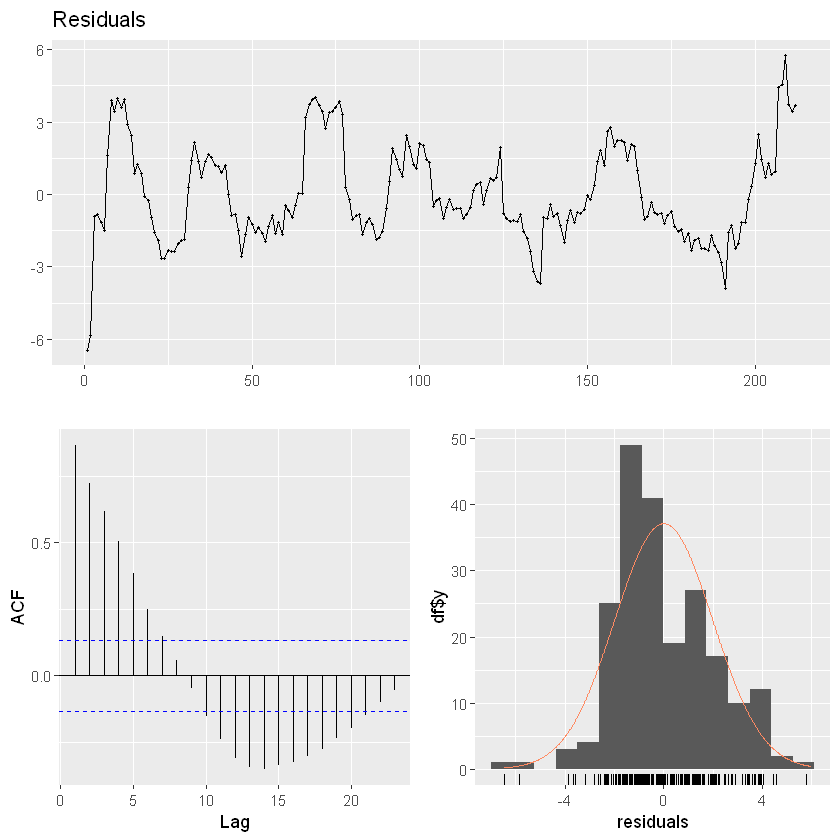

In [10]:
checkresiduals(model1)

In [11]:
residual = residuals(model1)
jarque.bera.test(residual)


	Jarque Bera Test

data:  residual
X-squared = 3.9708, df = 2, p-value = 0.1373


In [12]:
white.test(residual)


ERROR: Error in as.matrix(y): argument "y" is missing, with no default


In [15]:
white_test <- bptest(model1)
white_test


	studentized Breusch-Pagan test

data:  model1
BP = 49.34, df = 6, p-value = 6.374e-09


In [13]:
Box.test(residual, lag = 4, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 411.82, df = 4, p-value < 2.2e-16


In [17]:
model2 <- lm(RI ~ ., data = Disertatie[,-c(1,7)])
model2


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 7)])

Coefficients:
(Intercept)          RPM       R_CRED        R_DEP          EUR  RSBIM_15_74  
  -20.38110      1.04921      0.26731      0.02461      5.91670     -1.10566  


In [18]:
summary(model2)


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 7)])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9039 -1.5855 -0.5094  1.2886  7.8834 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.38110    3.74718  -5.439 1.47e-07 ***
RPM           1.04921    0.37948   2.765   0.0062 ** 
R_CRED        0.26731    0.22079   1.211   0.2274    
R_DEP         0.02461    0.22738   0.108   0.9139    
EUR           5.91670    0.80307   7.368 3.81e-12 ***
RSBIM_15_74  -1.10566    0.13315  -8.304 1.19e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.408 on 212 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6308,	Adjusted R-squared:  0.6221 
F-statistic: 72.45 on 5 and 212 DF,  p-value: < 2.2e-16


In [19]:
model3 <- lm(RI ~ ., data = Disertatie[,-c(1,5,7)])
model3


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 5, 7)])

Coefficients:
(Intercept)          RPM       R_CRED          EUR  RSBIM_15_74  
   -20.5797       1.0785       0.2577       5.9612      -1.1082  


In [20]:
summary(model3)


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 5, 7)])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9536 -1.6013 -0.5038  1.2843  7.8795 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.5797     3.2596  -6.314 1.56e-09 ***
RPM           1.0785     0.2654   4.064 6.80e-05 ***
R_CRED        0.2577     0.2018   1.277    0.203    
EUR           5.9612     0.6882   8.662 1.17e-15 ***
RSBIM_15_74  -1.1082     0.1307  -8.480 3.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.403 on 213 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6308,	Adjusted R-squared:  0.6239 
F-statistic: 90.98 on 4 and 213 DF,  p-value: < 2.2e-16


In [13]:
model4 <- lm(RI ~ ., data = Disertatie[,-c(1,4,5,7)])
model4


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 4, 5, 7)])

Coefficients:
(Intercept)          RPM          EUR  RSBIM_15_74  
    -18.283        1.402        5.393       -1.025  


In [14]:
summary(model4)


Call:
lm(formula = RI ~ ., data = Disertatie[, -c(1, 4, 5, 7)])

Residuals:
   Min     1Q Median     3Q    Max 
-7.385 -1.568 -0.587  1.312  7.946 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.28311    2.72274  -6.715 1.67e-10 ***
RPM           1.40157    0.08042  17.427  < 2e-16 ***
EUR           5.39297    0.52586  10.255  < 2e-16 ***
RSBIM_15_74  -1.02479    0.11335  -9.041  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.406 on 214 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.628,	Adjusted R-squared:  0.6228 
F-statistic: 120.4 on 3 and 214 DF,  p-value: < 2.2e-16


In [15]:
model_summary <- summary(model4)
coefficients <- model_summary$coefficients
coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-18.283105,2.72274489,-6.714953,1.666415e-10
RPM,1.401565,0.08042497,17.426989,6.288561e-43
EUR,5.392973,0.52586398,10.255452,2.492139e-20
RSBIM_15_74,-1.024793,0.11335382,-9.040659,9.512113e-17



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 179.05, df = 10, p-value < 2.2e-16


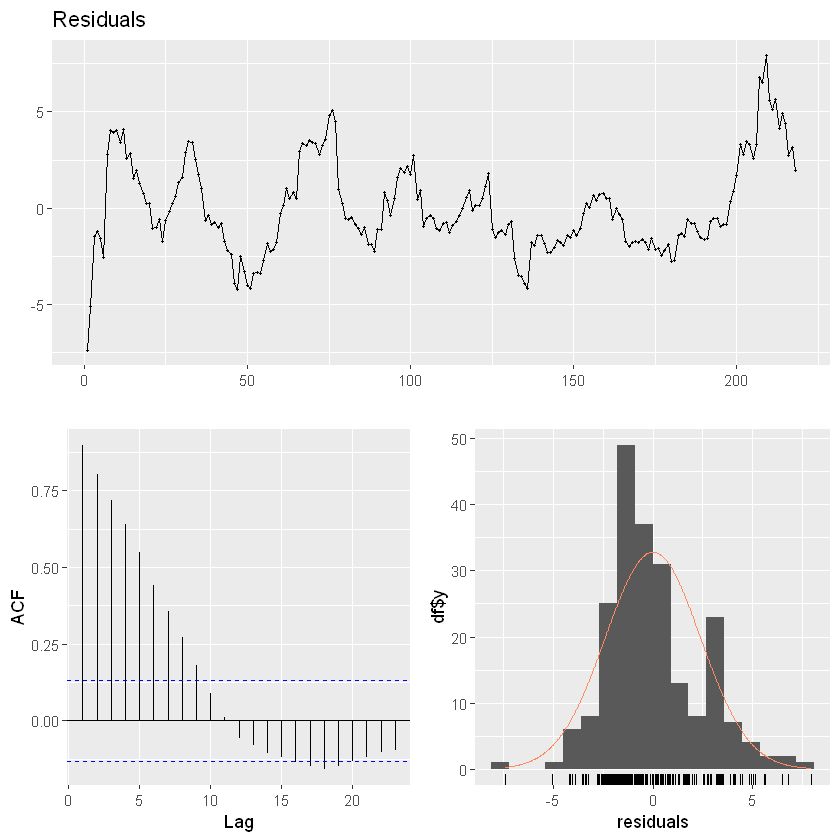

In [23]:
checkresiduals(model4)

In [32]:
residual = residuals(model4)
jarque.bera.test(residual)


	Jarque Bera Test

data:  residual
X-squared = 13.788, df = 2, p-value = 0.001014


In [37]:

white.test(residual)

ERROR: Error in as.matrix(y): argument "y" is missing, with no default


In [38]:
Box.test(residual, lag = 4, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 529, df = 4, p-value < 2.2e-16


In [40]:
y_pred <- predict(model4,  newdata = test_data)

In [41]:
y_pred

1        2        3        4        5        6 
11.20438 11.83235 11.98499 12.33700 12.35858 12.56137

In [42]:
test_data

Data,RI,RPM,R_CRED,R_DEP,EUR,SN,RSBIM_15_74
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-10-01,15.32,6.25,7.25,5.25,4.9266,4008,5.7
2022-11-01,16.76,6.75,7.75,5.75,4.9131,4141,5.7
2022-12-01,16.37,6.75,7.75,5.75,4.9224,4398,5.6
2023-01-01,15.07,7.00,8.00,6.00,4.9227,4254,5.6
2023-02-01,15.52,7.00,8.00,6.00,4.9077,4270,5.5
2023-03-01,14.53,7.00,8.00,6.00,4.9263,4554,5.4


In [43]:
RI         = data.frame(Disertatie$RI)
RPM        = data.frame(Disertatie$RPM)
R_CRED     = data.frame(Disertatie$R_CRED)
R_DEP      = data.frame(Disertatie$R_DEP)
EUR        = data.frame(Disertatie$EUR)
SN         = data.frame(Disertatie$SN)
RSBIM_15_74= data.frame(Disertatie$RSBIM_15_74)

In [44]:
RII <- ts(RI[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)
RPMI <- ts(RPM[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)
R_CREDI <- ts(R_CRED[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)
R_DEPI <- ts(R_DEP[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)
EURI <- ts(EUR[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)
SNI <- ts(SN[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)
RSBIM_15_74I <- ts(RSBIM_15_74[,1], start=c(2005,2), end=c(2023, 02), frequency = 12)

In [45]:
RI_test         = data.frame(test_data$RI)
RPM_test        = data.frame(test_data$RPM)
R_CRED_test     = data.frame(test_data$R_CRED)
R_DEP_test      = data.frame(test_data$R_DEP)
EUR_test        = data.frame(test_data$EUR)
SN_test         = data.frame(test_data$SN)
RSBIM_15_74_test= data.frame(test_data$RSBIM_15_74)

In [46]:
RI_test         = ts(RI_test, start=c(2022,10), end=c(2023, 02), frequency = 12)
RPM_test        = ts(RPM_test, start=c(2022,10), end=c(2023, 02), frequency = 12)
R_CRED_test     = ts(R_CRED_test, start=c(2022,10), end=c(2023, 02), frequency = 12)
R_DEP_test      = ts(R_DEP_test, start=c(2022,10), end=c(2023, 02), frequency = 12)
EUR_test        = ts(EUR_test, start=c(2022,10), end=c(2023, 02), frequency = 12)
SN_test         = ts(SN_test, start=c(2022,10), end=c(2023, 02), frequency = 12)
RSBIM_15_74_test= ts(RSBIM_15_74_test, start=c(2022,10), end=c(2023, 02), frequency = 12)

In [47]:
RI_train    = data.frame(train_data$RI)
RPM_train       = data.frame(train_data$RPM)
R_CRED_train     = data.frame(train_data$R_CRED)
R_DEP_train      = data.frame(train_data$R_DEP)
EUR_train        = data.frame(train_data$EUR)
SN_train         = data.frame(train_data$SN)
RSBIM_15_74_train= data.frame(train_data$RSBIM_15_74)

In [48]:
RI_train         = ts(RI_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
RPM_train        = ts(RPM_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
R_CRED_train     = ts(R_CRED_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
R_DEP_train      = ts(R_DEP_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
EUR_train        = ts(EUR_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
SN_train         = ts(SN_train, start=c(2005,2), end=c(2022, 09), frequency = 12)
RSBIM_15_74_train= ts(RSBIM_15_74_train, start=c(2005,2), end=c(2022, 09), frequency = 12)

In [49]:
RID1         = diff(RI_train)  
RPMD1        = diff(RPM_train)    
R_CREDD1     = diff(R_CRED_train)     
R_DEPD1      = diff(R_DEP_train)
EURD1        = diff(EUR_train)       
SND1         = diff(SN_train)
RSBIM_15_74D1= diff(RSBIM_15_74_train)

In [50]:
ts_data = data.frame(RID1, 
                     RPMD1,
                     R_CREDD1,    
                     R_DEPD1,
                     EURD1,      
                     SND1,
                     RSBIM_15_74D1)

In [52]:
model1 <- lm(RID1 ~ ., data = ts_data[-1])
model1


Call:
lm(formula = RID1 ~ ., data = ts_data[-1])

Coefficients:
           (Intercept)          train_data.RPM       train_data.R_CRED  
             0.0110088               0.1564964              -0.1978531  
      train_data.R_DEP          train_data.EUR           train_data.SN  
             0.2636354               0.7754433               0.0004657  
train_data.RSBIM_15_74  
            -0.1404181  


In [53]:
summary(model1)


Call:
lm(formula = RID1 ~ ., data = ts_data[-1])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1533 -0.2997 -0.0059  0.3096  3.5690 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)             0.0110088  0.0506916   0.217   0.8283  
train_data.RPM          0.1564964  0.1400509   1.117   0.2651  
train_data.R_CRED      -0.1978531  0.1123360  -1.761   0.0797 .
train_data.R_DEP        0.2636354  0.1662379   1.586   0.1143  
train_data.EUR          0.7754433  1.0443925   0.742   0.4586  
train_data.SN           0.0004657  0.0006668   0.698   0.4857  
train_data.RSBIM_15_74 -0.1404181  0.1623950  -0.865   0.3882  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.697 on 204 degrees of freedom
Multiple R-squared:  0.02921,	Adjusted R-squared:  0.0006538 
F-statistic: 1.023 on 6 and 204 DF,  p-value: 0.4114


In [63]:
model1 <- lm(RID1 ~ ., data = ts_data[,-c(1,2,4,5,6,7)])
model1

ERROR: Error in model.frame.default(formula = RID1 ~ ., data = ts_data[, -c(1, : 'data' must be a data.frame, environment, or list


In [61]:
summary(model1)


Call:
lm(formula = RID1 ~ ., data = ts_data[, -c(1, 4, 5, 6, 7)])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1139 -0.3039 -0.0345  0.2811  3.5761 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)        0.03394    0.04858   0.699    0.486
train_data.RPM     0.19287    0.13757   1.402    0.162
train_data.R_CRED -0.09701    0.08975  -1.081    0.281

Residual standard error: 0.6969 on 208 degrees of freedom
Multiple R-squared:  0.0105,	Adjusted R-squared:  0.0009814 
F-statistic: 1.103 on 2 and 208 DF,  p-value: 0.3338


In [25]:
log_likelihood <- logLik(model4)
log_likelihood

'log Lik.' -498.7153 (df=5)

In [26]:
aic <- AIC(model4)
bic <- BIC(model4)

In [27]:
aic
bic

[1] 1007.431

[1] 1024.353